
#Pré-processamento dos dados

Esse notenook é referente ao pré-processamento dos dados do dataset Food Recipes, que será utilizado para desenvolvimento da aplicação Linguine. 

## Instalação de bibliotecas externas


In [19]:
!pip install googletrans==3.1.0a0

## Importação de bibliotecas


In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno
from sklearn.impute import SimpleImputer
import plotly.express as px
from sklearn.cluster import KMeans
# from googletrans import Translator
import sys
import time

import plotly.graph_objects as go

##Exploração dos dados

In [21]:
df = pd.read_csv(r'C:\Users\jessi\Documents\GitHub\Linguini-pisi\data\data.csv')

In [22]:
df.head()

,recipe_title,url,record_health,vote_count,rating,description,cuisine,course,diet,prep_time,cook_time,ingredients,instructions,author,tags,category
0,Roasted Peppers And Mushroom Tortilla Pizza Re...,https://www.archanaskitchen.com/roasted-pepper...,good,434,4.958525,is a quicker version pizza to satisfy your cr...,Mexican,Dinner,Vegetarian,15 M,15 M,Tortillas|Extra Virgin Olive Oil|Garlic|Mozzar...,To begin making the Roasted Peppers And Mushro...,Divya Shivaraman,Party Food Recipes|Tea Party Recipes|Mushroom ...,Pizza Recipes
1,Thakkali Gotsu Recipe | Thakkali Curry | Spicy...,https://www.archanaskitchen.com/tomato-gotsu-r...,good,3423,4.932223,also known as the is a quick and easy to ma...,South Indian Recipes,Lunch,Vegetarian,10 M,20 M,Sesame (Gingelly) Oil|Mustard seeds (Rai/ Kadu...,To begin making Tomato Gotsu Recipe/ Thakkali ...,Archana Doshi,Vegetarian Recipes|Tomato Recipes|South Indian...,Indian Curry Recipes
2,Spicy Grilled Pineapple Salsa Recipe,https://www.archanaskitchen.com/spicy-grilled-...,good,2091,4.945959,Spicy Grilled Pineapple Salsa is a simple reci...,Mexican,Side Dish,Vegetarian,10 M,0 M,Extra Virgin Olive Oil|Pineapple|White onion|R...,To begin making the Spicy Grilled Pineapple Sa...,Archana's Kitchen,Party Starter & Appetizer Recipes|Pineapple Re...,Mexican Recipes
3,Karwar Style Dali Thoy Recipe - Toor dal Curry,https://www.archanaskitchen.com/dali-thoy-reci...,good,990,4.888889,The is a quintessential of Konkani dish whic...,Coastal Karnataka,Side Dish,High Protein Vegetarian,5 M,20 M,Arhar dal (Split Toor Dal)|Turmeric powder (Ha...,To prepare Karwar Style Dali Thoy Recipe (Toor...,Jyothi Rajesh,Side Dish Recipes|South Indian Recipes|Indian ...,Indian Curry Recipes
4,Rajma Kofta In Milk And Poppy Seed Gravy Recipe,https://www.archanaskitchen.com/rajma-kofta-in...,good,345,4.828986,Koftas are traditional Indian recipes mostly w...,North Indian Recipes,Side Dish,High Protein Vegetarian,20 M,30 M,Rajma (Large Kidney Beans)|Cashew nuts|Sultana...,To begin making Rajma Kofta In Milk And Poppy ...,RUBY PATHAK,Side Dish Recipes|Indian Lunch Recipes|Office ...,Kofta Recipes


###Análise dos tipos de variáveis



1. recipe_title
2. url 
3. record_health 
4. vote_count 
5. rating 
6. description 
7. cuisine 
8. course 
9. diet 
10. prep_time 
11. cook_time 
12. ingredients 
13. instructions 
14. author 
15. tags 
16. category

In [23]:
df.shape

(8009, 16)

In [24]:
df.columns

Index(['recipe_title', 'url', 'record_health', 'vote_count', 'rating',
       'description', 'cuisine', 'course', 'diet', 'prep_time', 'cook_time',
       'ingredients', 'instructions', 'author', 'tags', 'category'],
      dtype='object')

In [25]:
df.describe()

,vote_count,rating
count,8009.000000,8009.000000
mean,2268.004495,4.888621
std,3683.156570,0.077467
min,15.000000,3.175705
25%,494.000000,4.865031
50%,1050.000000,4.900553
75%,2487.000000,4.930000
max,80628.000000,5.000000


In [26]:
pd.DataFrame.info(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8009 entries, 0 to 8008
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   recipe_title   8009 non-null   object 
 1   url            8009 non-null   object 
 2   record_health  8009 non-null   object 
 3   vote_count     8009 non-null   int64  
 4   rating         8009 non-null   float64
 5   description    7994 non-null   object 
 6   cuisine        7943 non-null   object 
 7   course         7854 non-null   object 
 8   diet           7858 non-null   object 
 9   prep_time      7979 non-null   object 
 10  cook_time      7979 non-null   object 
 11  ingredients    7997 non-null   object 
 12  instructions   8009 non-null   object 
 13  author         8009 non-null   object 
 14  tags           7930 non-null   object 
 15  category       8009 non-null   object 
dtypes: float64(1), int64(1), object(14)
memory usage: 1001.2+ KB


###Visualização dos dados

In [27]:
df.isna().sum()

recipe_title       0
url                0
record_health      0
vote_count         0
rating             0
description       15
cuisine           66
course           155
diet             151
prep_time         30
cook_time         30
ingredients       12
instructions       0
author             0
tags              79
category           0
dtype: int64

In [28]:
df[['cook_time','prep_time','ingredients', 'instructions']].head(1)

,cook_time,prep_time,ingredients,instructions
0,15 M,15 M,Tortillas|Extra Virgin Olive Oil|Garlic|Mozzar...,To begin making the Roasted Peppers And Mushro...


In [29]:
sns.set_style('dark')
sns.set_theme(color_codes=True)

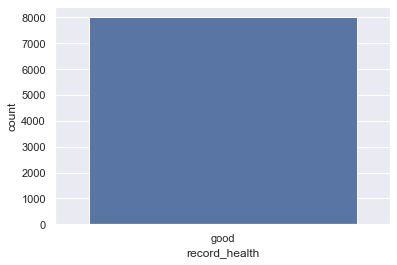

In [30]:
sns.countplot(x = df['record_health']); #this column must be dropped

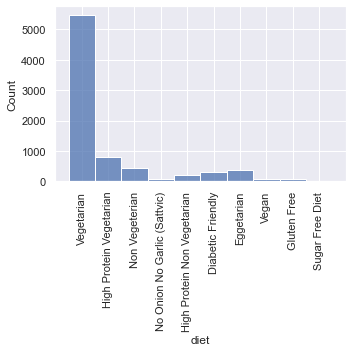

In [31]:
f, ax = plt.subplots(figsize=(5, 5))
h = sns.histplot(x = 'diet',data = df, bins = 20);
plt.xticks(rotation=90);
plt.tight_layout()

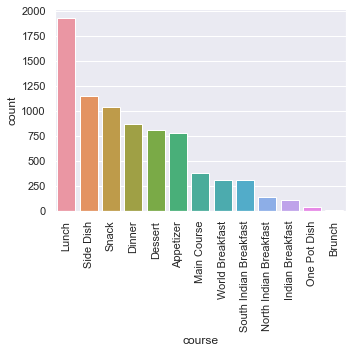

In [32]:
f, ax = plt.subplots(figsize=(5, 5))
h = sns.countplot(x = 'course',data = df, order = df['course'].value_counts().index);
plt.xticks(rotation=90);
plt.tight_layout()

In [34]:
graf = px.scatter_matrix(df, dimensions=['diet','prep_time', 'cook_time', 'rating'])
graf.show()

##Limpeza de dados

###Visualização dos dados

<AxesSubplot:>

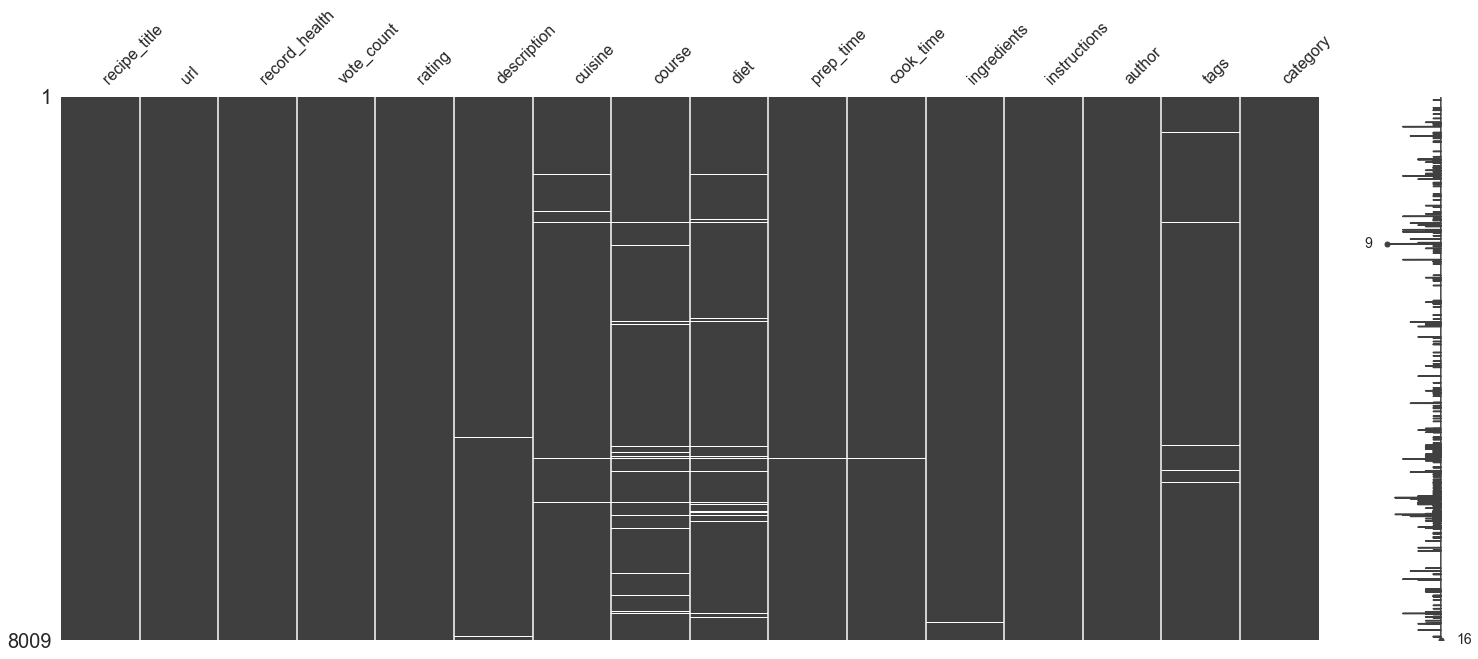

In [35]:
msno.matrix(df)

In [36]:
cols_with_missing = [col for col in df.columns if df[col].isnull().any()]
cols_with_missing

['description',
 'cuisine',
 'course',
 'diet',
 'prep_time',
 'cook_time',
 'ingredients',
 'tags']

In [37]:
df.shape

(8009, 16)

In [38]:
df[df['description'].isna()]

,recipe_title,url,record_health,vote_count,rating,description,cuisine,course,diet,prep_time,cook_time,ingredients,instructions,author,tags,category
528,Barnyard Millet and Ragi Khichdi Recipe,https://www.archanaskitchen.com/barnyard-mille...,good,4600,4.828913,NaN,North Indian Recipes,Dinner,Vegetarian,20 M,45 M,Barnyard Millet|Yellow Moong Dal (Split)|Ragi ...,Note: The method below will result in a mushy ...,Archana Doshi,Healthy Recipes|One Dish Recipes|Millet Recipe...,Khichdi Recipes
2272,Healthy Creamy Chicken Soup With Vegetables Re...,https://www.archanaskitchen.com/healthy-creamy...,good,666,4.758258,NaN,Continental,Appetizer,Non Vegeterian,10 M,60 M,Chicken breasts|Lukewarm Water|Onion|Garlic|Ce...,To begin making the Healthy Creamy Chicken Sou...,Archana's Kitchen,Healthy Recipes|High Protein Diet|Winter Recip...,Soup Recipes
2685,Corn Bhel Recipe,https://www.archanaskitchen.com/corn-bhel-recipe,good,760,4.897368,NaN,North Indian Recipes,Snack,Vegetarian,30 M,10 M,Sweet corn|Onion|Potato (Aloo)|Chaat Masala Po...,"To begin making the Corn Bhel recipe, take a| ...",Pooja Thakur,Aloo Recipes (Potato & Baby Potato Recipes)|Te...,Indian Snack Recipes
3003,Kashmiri Style Modur Pulao Recipe - Kashmiri S...,https://www.archanaskitchen.com/modur-pulao-re...,good,1616,4.847772,NaN,Kashmiri,Lunch,Vegetarian,15 M,35 M,Basmati rice|Sugar|Bay leaves (tej patta)|Clov...,"To begin making the Modur Pulao Recipe, wash r...",Karthika Gopalakrishnan,Party Food Recipes|Festival Recipes|Indian Din...,Pulao Recipes
3768,Vegan Godhi Payasa Recipe - Lapsi Kheer,https://www.archanaskitchen.com/vegan-godhi-pa...,good,466,4.944206,NaN,South Indian Recipes,Dessert,Vegetarian,140 M,30 M,Broken Wheat (Dalia/ Godumai Rava)|Coconut Oil...,"To begin making the Vegan Godhi Payasa recipe,...",Gauravi Vinay,Festival Recipes|Payasam Recipes & Kheer Recip...,Dessert Recipes
3896,Fried Poha Chivda Recipe - Flatten Rice Spicy ...,https://www.archanaskitchen.com/fried-poha-chi...,good,981,4.775739,NaN,North Indian Recipes,Snack,Vegetarian,10 M,20 M,Poha (Flattened rice)|Roasted Peanuts (Moongph...,"To begin making the Fried Poha Chivda recipe, ...",Aparna Parinam,Diwali Recipes|Festival Recipes|Tea Party Reci...,Indian Snack Recipes
3935,Cheesy Vegetarian Pizza Muffins Recipe,https://www.archanaskitchen.com/cheesy-vegetar...,good,1220,4.842623,NaN,Fusion,Appetizer,Vegetarian,10 M,45 M,All Purpose Flour (Maida)|Baking powder|Salt|G...,To begin making the Cheesy Vegetarian Pizza Mu...,Uma Pandit,Tea Party Recipes|Party Starter & Appetizer Re...,Pizza Recipes
4516,Homemade Apple Sauce Recipe,https://www.archanaskitchen.com/how-to-make-ho...,good,650,4.916923,NaN,NaN,NaN,NaN,10 M,20 M,Apples|Water|Sugar|Cinnamon Powder (Dalchini),To begin making the Homemade Applesauce recipe...,Archana Doshi,Apple Recipes|Baby Food Recipes,"Homemade Jams, Sauce & Pesto Recipes"
4552,Lemon 7 Up Cake Recipe,https://www.archanaskitchen.com/lemon-7-up-cak...,good,449,4.919822,NaN,Indian,Dessert,Vegetarian,105 M,90 M,Sugar|Whole Egg|All Purpose Flour (Maida)|Lemo...,"To begin making the Lemon 7 Up Cake recipe, cr...",Anupama Nair,Birthday Party Cakes|Lemon Recipes,Cake Recipes
5027,Beetroot Chutney Recipe,https://www.archanaskitchen.com/beetroot-chutn...,good,697,4.849354,NaN,South Indian Recipes,Side Dish,Diabetic Friendly,20 M,20 M,Beetroot|Curry leaves|Green Chillies|Asafoetid...,"To begin making the Beetroot Chutney recipe, h...",Pooja Thakur,Side Dish Recipes|South Indian Recipes|Beetroo...,Indian Chutney Recipes


In [39]:
df[(df['cook_time'] == '0 M')]

,recipe_title,url,record_health,vote_count,rating,description,cuisine,course,diet,prep_time,cook_time,ingredients,instructions,author,tags,category
2,Spicy Grilled Pineapple Salsa Recipe,https://www.archanaskitchen.com/spicy-grilled-...,good,2091,4.945959,Spicy Grilled Pineapple Salsa is a simple reci...,Mexican,Side Dish,Vegetarian,10 M,0 M,Extra Virgin Olive Oil|Pineapple|White onion|R...,To begin making the Spicy Grilled Pineapple Sa...,Archana's Kitchen,Party Starter & Appetizer Recipes|Pineapple Re...,Mexican Recipes
6,Mexican Green Sauce Recipe,https://www.archanaskitchen.com/mexican-green-...,good,506,4.956522,is a cold sauce made with fresh herbs and spi...,Mexican,Side Dish,Vegetarian,10 M,0 M,Coriander (Dhania) Leaves|Tahini|Lemon juice|E...,To begin making the Mexican Green Sauce Recipe...,Archana's Kitchen,Side Dish Recipes|Party Starter & Appetizer Re...,"Homemade Jams, Sauce & Pesto Recipes"
15,Mango Tomato Bean Salsa Recipe,https://www.archanaskitchen.com/mango-tomato-b...,good,448,4.859375,Mango Tomato Bean Salsa is a refreshing summer...,Mexican,Appetizer,Vegetarian,10 M,0 M,Mango (Ripe)|Tomato|Onion|Rajma (Large Kidney ...,"To begin making the Mango Bean Salsa Recipe, p...",Archana's Kitchen,Side Dish Recipes|Tomato Recipes|Healthy Recip...,Continental Party Appetizer & Starter Recipes
82,Papaya Parsley Salad with Cheese Recipe,https://www.archanaskitchen.com/papaya-parsley...,good,398,4.939698,The Papaya Parsley Salad with Cheese recipe is...,European,Appetizer,Vegetarian,20 M,0 M,Papaya|Onion|Parsley leaves|Lemon|Feta Cheese|...,To begin making the Papaya Salad prep all the ...,Archana Doshi,Healthy Recipes|Bachelor Recipes|Papaya Recipe...,Salad Recipes
113,No Bake Eggless Mango Cheesecake Recipe,https://www.archanaskitchen.com/no-bake-eggles...,good,12501,4.872410,is one of the simplest desserts to make for ...,Continental,Dessert,Vegetarian,30 M,0 M,Multigrain Digestive Oat Biscuits|Butter (Salt...,To begin making the No Bake Eggless Mango Chee...,Archana Doshi,Tea Party Recipes|Summer Recipe Ideas|Mango Re...,Dessert Recipes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7910,"Lettuce, Apple And Carrot Salad With Chilli Dr...",https://www.archanaskitchen.com/lettuce-apple-...,good,1453,4.898142,is a delicious homemade salad where apple and...,Continental,Side Dish,Vegetarian,15 M,0 M,Iceberg lettuce|Carrot (Gajjar)|Apple|Cucumber...,"To begin making the Lettuce, Apple And Carrot ...",Archana's Kitchen,Party Food Recipes|Side Dish Recipes|Healthy R...,Salad Recipes
7924,Asian Cabbage Salad with Ginger Peanut Dressing,https://www.archanaskitchen.com/asian-cabbage-...,good,3413,4.929388,Carrot Cabbage Salad Recipe With Peanut Ginger...,Asian,Appetizer,Vegetarian,25 M,0 M,Carrots (Gajjar)|Cabbage (Patta Gobi/ Muttaiko...,To begin making the Asian Cabbage Salad with G...,Archana Doshi,Party Food Recipes|Vegetarian Recipes|Side Dis...,Salad Recipes
7966,"Red Cabbage Carrot, Sprout And Onion Salad Recipe",https://www.archanaskitchen.com/sprouted-beans...,good,602,4.925249,"Red Cabbage Carrot, Sprout And Onion Salad Rec...",Continental,Side Dish,High Protein Vegetarian,30 M,0 M,Red cabbage|Carrots (Gajjar)|Apple|Red onion|M...,"To begin making the Red Cabbage Carrot, Sprout...",Archana Doshi,Sprout Recipes|Summer Recipe Ideas|Apple Recipes,Salad Recipes
7989,Chimichurri Sauce Recipe,https://www.archanaskitchen.com/chimichurri-sa...,good,122,5.000000,A condiment native to the South American regio...,Continental,Side Dish,Vegetarian,10 M,0 M,Coriander (Dhania) Leaves|Parsley leaves|Green...,"To begin making the Chimichurri Sauce, wash th...",Archana's Kitchen,Vegetarian Recipes|Side Dish Recipes|Green Lea...,"Homemade Jams, Sauce & Pesto Recipes"


In [40]:
df[(df['prep_time']==0)]

,recipe_title,url,record_health,vote_count,rating,description,cuisine,course,diet,prep_time,cook_time,ingredients,instructions,author,tags,category


### Exclusão de linhas e colunas

In [41]:
df[df['recipe_title'].duplicated()]

,recipe_title,url,record_health,vote_count,rating,description,cuisine,course,diet,prep_time,cook_time,ingredients,instructions,author,tags,category


In [42]:
df = df.dropna(subset=['ingredients','instructions', 'recipe_title', 'diet'])

In [43]:
df = df.drop(['url', 'record_health'], axis=1)

In [44]:
df.iloc[0:2,:]

,recipe_title,vote_count,rating,description,cuisine,course,diet,prep_time,cook_time,ingredients,instructions,author,tags,category
0,Roasted Peppers And Mushroom Tortilla Pizza Re...,434,4.958525,is a quicker version pizza to satisfy your cr...,Mexican,Dinner,Vegetarian,15 M,15 M,Tortillas|Extra Virgin Olive Oil|Garlic|Mozzar...,To begin making the Roasted Peppers And Mushro...,Divya Shivaraman,Party Food Recipes|Tea Party Recipes|Mushroom ...,Pizza Recipes
1,Thakkali Gotsu Recipe | Thakkali Curry | Spicy...,3423,4.932223,also known as the is a quick and easy to ma...,South Indian Recipes,Lunch,Vegetarian,10 M,20 M,Sesame (Gingelly) Oil|Mustard seeds (Rai/ Kadu...,To begin making Tomato Gotsu Recipe/ Thakkali ...,Archana Doshi,Vegetarian Recipes|Tomato Recipes|South Indian...,Indian Curry Recipes


In [45]:
df.isna().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of       recipe_title  vote_count  rating  description  cuisine  course   diet  \
0            False       False   False        False    False   False  False   
1            False       False   False        False    False   False  False   
2            False       False   False        False    False   False  False   
3            False       False   False        False    False   False  False   
4            False       False   False        False    False   False  False   
...            ...         ...     ...          ...      ...     ...    ...   
8004         False       False   False        False    False   False  False   
8005         False       False   False        False    False   False  False   
8006         False       False   False        False    False   False  False   
8007         False       False   False        False    False   False  False   
8008         False       False   False        False    False   False 

###Tratamento do tipo das variáveis

In [46]:
df['ingredients'] = df['ingredients'].apply(lambda x: x.split('|'))
df['instructions'] = df['instructions'].apply(lambda x: x.replace('|',''))
df['tags'] = df['tags'].apply(lambda x: x.split('|') if type(x)!= float else x)
df['prep_time']=df['prep_time'].apply(lambda x: int(x.replace('M', '')) if type(x)!= float else x)
df['cook_time'] = df['cook_time'].apply(lambda x: int(x.replace('M', '')) if type(x)!= float else x)

###Tratamento de valores faltantes

In [47]:
df['cook_time'].fillna(df['cook_time'].mean(), inplace = True)
df['prep_time'].fillna(df['prep_time'].mean(), inplace = True)

In [48]:
df.head(1)

,recipe_title,vote_count,rating,description,cuisine,course,diet,prep_time,cook_time,ingredients,instructions,author,tags,category
0,Roasted Peppers And Mushroom Tortilla Pizza Re...,434,4.958525,is a quicker version pizza to satisfy your cr...,Mexican,Dinner,Vegetarian,15.0,15.0,"[Tortillas, Extra Virgin Olive Oil, Garlic, Mo...",To begin making the Roasted Peppers And Mushro...,Divya Shivaraman,"[Party Food Recipes, Tea Party Recipes, Mushro...",Pizza Recipes


In [49]:
df.isna().sum()

recipe_title     0
vote_count       0
rating           0
description     14
cuisine         16
course          60
diet             0
prep_time        0
cook_time        0
ingredients      0
instructions     0
author           0
tags            70
category         0
dtype: int64

In [50]:
df['course']

0          Dinner
1           Lunch
2       Side Dish
3       Side Dish
4       Side Dish
          ...    
8004       Dinner
8005        Lunch
8006    Side Dish
8007        Snack
8008        Lunch
Name: course, Length: 7852, dtype: object

In [51]:
df = df.dropna(subset=['description','cuisine', 'course', 'tags'])

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7695 entries, 0 to 8008
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe_title  7695 non-null   object 
 1   vote_count    7695 non-null   int64  
 2   rating        7695 non-null   float64
 3   description   7695 non-null   object 
 4   cuisine       7695 non-null   object 
 5   course        7695 non-null   object 
 6   diet          7695 non-null   object 
 7   prep_time     7695 non-null   float64
 8   cook_time     7695 non-null   float64
 9   ingredients   7695 non-null   object 
 10  instructions  7695 non-null   object 
 11  author        7695 non-null   object 
 12  tags          7695 non-null   object 
 13  category      7695 non-null   object 
dtypes: float64(3), int64(1), object(10)
memory usage: 901.8+ KB


In [53]:
df.head(2)

,recipe_title,vote_count,rating,description,cuisine,course,diet,prep_time,cook_time,ingredients,instructions,author,tags,category
0,Roasted Peppers And Mushroom Tortilla Pizza Re...,434,4.958525,is a quicker version pizza to satisfy your cr...,Mexican,Dinner,Vegetarian,15.0,15.0,"[Tortillas, Extra Virgin Olive Oil, Garlic, Mo...",To begin making the Roasted Peppers And Mushro...,Divya Shivaraman,"[Party Food Recipes, Tea Party Recipes, Mushro...",Pizza Recipes
1,Thakkali Gotsu Recipe | Thakkali Curry | Spicy...,3423,4.932223,also known as the is a quick and easy to ma...,South Indian Recipes,Lunch,Vegetarian,10.0,20.0,"[Sesame (Gingelly) Oil, Mustard seeds (Rai/ Ka...",To begin making Tomato Gotsu Recipe/ Thakkali ...,Archana Doshi,"[Vegetarian Recipes, Tomato Recipes, South Ind...",Indian Curry Recipes


In [ ]:
df.columns

Index(['recipe_title', 'vote_count', 'rating', 'description', 'cuisine',
       'course', 'diet', 'prep_time', 'cook_time', 'ingredients',
       'instructions', 'author', 'tags', 'category'],
      dtype='object')

##Divisão entre previsores e classe 

In [ ]:
x = df.iloc[:, [1, 2, 4, 5, 6, 7, 8, 13]]

## Tratamento de atributos categóricos


Algoritmos de machine learning precisam de valores numéricos para realizar os cálculos das fórmulas matemáticas implementadas. 

Dessa forma, é necessário transformar variáveis categóricas em strings.


####OneHotEncoder

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer

In [ ]:
onehotencoder = ColumnTransformer(transformers =[('', OneHotEncoder(), [2,3,4,7])], remainder ='passthrough')

In [ ]:
x_new = onehotencoder.fit_transform(x).toarray()

In [ ]:
x_new

array([[ 0.        ,  0.        ,  0.        , ...,  4.95852535,
        15.        , 15.        ],
       [ 0.        ,  0.        ,  0.        , ...,  4.9322232 ,
        10.        , 20.        ],
       [ 0.        ,  0.        ,  0.        , ...,  4.94595887,
        10.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  4.94675541,
        10.        , 15.        ],
       [ 0.        ,  0.        ,  0.        , ...,  4.9256705 ,
        10.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  4.81541301,
        15.        , 20.        ]])

In [ ]:
onehotencoder.get_feature_names_out()

array(['__cuisine_Afghan', '__cuisine_African', '__cuisine_American',
       '__cuisine_Andhra', '__cuisine_Arab', '__cuisine_Asian',
       '__cuisine_Assamese', '__cuisine_Awadhi', '__cuisine_Bangladeshi',
       '__cuisine_Bengali Recipes', '__cuisine_Bihari',
       '__cuisine_British', '__cuisine_Burmese', '__cuisine_Cantonese',
       '__cuisine_Caribbean ', '__cuisine_Chettinad', '__cuisine_Chinese',
       '__cuisine_Coastal Karnataka', '__cuisine_Continental',
       '__cuisine_Coorg', '__cuisine_European', '__cuisine_French',
       '__cuisine_Fusion', '__cuisine_Goan Recipes', '__cuisine_Greek',
       '__cuisine_Gujarati Recipes\ufeff', '__cuisine_Haryana',
       '__cuisine_Himachal', '__cuisine_Hunan', '__cuisine_Hyderabadi',
       '__cuisine_Indian', '__cuisine_Indo Chinese',
       '__cuisine_Indonesian', '__cuisine_Italian Recipes',
       '__cuisine_Japanese', '__cuisine_Jewish', '__cuisine_Jharkhand',
       '__cuisine_Karnataka', '__cuisine_Kashmiri',
       '__cui

In [ ]:
x_new[2]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

##Escalonamento dos valores

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_new = scaler.fit_transform(x_new)

In [ ]:
x_new = pd.DataFrame(x_new, columns = onehotencoder.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [ ]:
x_new.head(1)

,__x0_Afghan,__x0_African,__x0_American,__x0_Andhra,__x0_Arab,__x0_Asian,__x0_Assamese,__x0_Awadhi,__x0_Bangladeshi,__x0_Bengali Recipes,...,__x3_Toast Recipes,__x3_Upma Recipes,__x3_Uttapam Recipes,__x3_Variety Rice (Mixed Rice/ Flavoured Rice Recipes),__x3_Waffle Recipes,__x3_World Recipes,vote_count,rating,prep_time,cook_time
0,-0.019749,-0.051048,-0.027934,-0.133631,-0.022805,-0.108786,-0.062561,-0.078393,-0.011401,-0.15954,...,-0.079227,-0.095121,-0.036073,-0.148028,-0.036073,-0.011401,-0.494479,0.900567,-0.157171,-0.416196


In [ ]:
x_new.iloc[0:3, :]

,__x0_Afghan,__x0_African,__x0_American,__x0_Andhra,__x0_Arab,__x0_Asian,__x0_Assamese,__x0_Awadhi,__x0_Bangladeshi,__x0_Bengali Recipes,...,__x3_Toast Recipes,__x3_Upma Recipes,__x3_Uttapam Recipes,__x3_Variety Rice (Mixed Rice/ Flavoured Rice Recipes),__x3_Waffle Recipes,__x3_World Recipes,vote_count,rating,prep_time,cook_time
0,-0.019749,-0.051048,-0.027934,-0.133631,-0.022805,-0.108786,-0.062561,-0.078393,-0.011401,-0.15954,...,-0.079227,-0.095121,-0.036073,-0.148028,-0.036073,-0.011401,-0.494479,0.900567,-0.157171,-0.416196
1,-0.019749,-0.051048,-0.027934,-0.133631,-0.022805,-0.108786,-0.062561,-0.078393,-0.011401,-0.15954,...,-0.079227,-0.095121,-0.036073,-0.148028,-0.036073,-0.011401,0.315360,0.559367,-0.213414,-0.289777
2,-0.019749,-0.051048,-0.027934,-0.133631,-0.022805,-0.108786,-0.062561,-0.078393,-0.011401,-0.15954,...,-0.079227,-0.095121,-0.036073,-0.148028,-0.036073,-0.011401,-0.045532,0.737551,-0.213414,-0.795452


In [ ]:
x_new.shape

(7695, 201)

##Visualização

In [ ]:
f, ax = plt.subplots(figsize=(5, 5))
h = sns.countplot(x = 'course',data = df, order = df['course'].value_counts().index);
plt.xticks(rotation=90);
plt.tight_layout()

In [ ]:
df_cuisine = df[df['cuisine'].notnull()]
f, ax = plt.subplots(figsize=(12, 14))
h = sns.histplot(y = 'cuisine', data = df_cuisine);
plt.xticks(rotation=90);
plt.tight_layout()

In [ ]:
df_diet = df[df['diet'].notnull()]
f, ax = plt.subplots(figsize=(10, 9))
h = sns.histplot(x = 'diet',data = df_diet, bins = 20);
plt.xticks(rotation=90);
plt.tight_layout()

In [ ]:
df_diet = df[df['diet'].notnull()]
f, ax = plt.subplots(figsize=(10, 9))
h = sns.histplot(x = 'diet',data = df_diet, bins=20, hue = 'course');
plt.xticks(rotation=90);
plt.tight_layout()

In [ ]:
nxn = sns.scatterplot(data=df_diet,x = 'cook_time', y="prep_time")
plt.tight_layout();

In [ ]:
nxn = sns.scatterplot(data=df_diet,x = 'rating', y="prep_time")
plt.tight_layout();

In [ ]:
plt.hist(df['prep_time'], range= (0, 1200));
plt.title("Tempo de preparação x Quantidade de receitas");
plt.xlabel("Tempo de preparação");
plt.ylabel("Frequência");

In [ ]:
sns.histplot(df['rating'], discrete=True);

In [ ]:
sns.regplot(df['prep_time'], df['rating']);

In [ ]:
sns.set_theme(color_codes=True)

In [ ]:
sns.regplot(df['cook_time'], df['rating']);

In [ ]:
graph.isna().sum()

In [ ]:
sns.set_theme(style="ticks", palette="pastel")
graph = df[df['diet'].notnull()]
sns.boxplot(data = graph, y = 'diet', x = 'rating', palette = ['m', 'g'])
sns.despine(offset=10, trim= True)

In [ ]:
# Teste area
# nxn = sns.scatterplot(data=df_diet,x = 'rating', y="prep_time")
# plt.tight_layout();

base = df.iloc[:, [2, 8]].values

scalerSal = StandardScaler()
base = scalerSal.fit_transform(base)

kmeansBase = KMeans(n_clusters=3)
kmeansBase.fit(base)

centroides = kmeansBase.cluster_centers_
scalerSal.inverse_transform(kmeansBase.cluster_centers_)

rot = kmeansBase.labels_

graf1 = px.scatter(x = base[:,0], y = base[:,1], color=rot)
graf2 = px.scatter(x = centroides[:,0], y = centroides[:,1], size=[12,12,12])
graf3 = go.Figure(data = graf1.data + graf2.data)
graf3.show()
# nxn = sns.scatterplot(data=base,x = base[:,0], y=base[:,1], palette="YlOrBr")
# nxn2 = sns.scatterplot(data=centroides,x = centroides[:,0], y=centroides[:,1])


# Tradução do Dataset

In [ ]:
df.dtypes

recipe_title     object
vote_count        int64
rating          float64
description      object
cuisine          object
course           object
diet             object
prep_time       float64
cook_time       float64
ingredients      object
instructions     object
author           object
tags             object
category         object
dtype: object

In [ ]:
translator = Translator()
variablesToTranslate = ['recipe_title', 'description', 'cuisine', 'course', 'diet', 'instructions', 'author', 'category']

In [ ]:
df_length = len(df.index)
index_percentage = 2669
animation = ["[■□□□□□□□□□]","[■■□□□□□□□□]", "[■■■□□□□□□□]", "[■■■■□□□□□□]", "[■■■■■□□□□□]", "[■■■■■■□□□□]", "[■■■■■■■□□□]", "[■■■■■■■■□□]", "[■■■■■■■■■□]", "[■■■■■■■■■■]"]
percentage = [round(index_percentage * 0.1), round(index_percentage * 0.2), round(index_percentage * 0.3), round(index_percentage * 0.4), round(index_percentage * 0.5), round(index_percentage * 0.6), round(index_percentage * 0.7), round(index_percentage * 0.8), round(index_percentage * 0.9), round(index_percentage * 1)]

In [ ]:
def TranslateRows(row):
  for column in variablesToTranslate:
    if (isinstance(row[column], list)):
      try:
        string = ''.join(f"'{value}'|" for value in row[column])[:-1]
        translated_string = translator.translate(string, src='en', dest='pt')
        translated_string = translated_string.text.replace("'", '')
        row[column] = translated_string.split('|')
      except:
        continue
    else:
      try:
        translation = translator.translate(row[column], src='en', dest='pt')
        row[column] = translation.text[0].upper() + translation.text[1:]
      except:
        continue
  
  if row.name in percentage:
    sys.stdout.write("\r" + animation[percentage.index(row.name)])
    sys.stdout.flush()
  
  return row

In [ ]:
df_first = df.iloc[:2669]
df_second = df.iloc[2669:5338]
df_third = df.iloc[5338:]

In [ ]:
print("Loading:")
sys.stdout.write("\r" + "[□□□□□□□□□□]")
sys.stdout.flush()

initial_timer = time.time()
df_translated = df_first.apply(TranslateRows, axis=1)
finish_timer = time.time()

print(f'Tempo de execução: {abs(initial_timer - finish_timer)}')
df_translated.to_csv('food_recipes_translated_1.csv.zip')

Loading:
[■■■■■■■■■■]Tempo de execução: $1693.4740614891052


In [ ]:
index_percentage = 5338
percentage = [round(index_percentage * 0.1), round(index_percentage * 0.2), round(index_percentage * 0.3), round(index_percentage * 0.4), round(index_percentage * 0.5), round(index_percentage * 0.6), round(index_percentage * 0.7), round(index_percentage * 0.8), round(index_percentage * 0.9), round(index_percentage * 1)]
print("Loading:")
sys.stdout.write("\r" + "[□□□□□□□□□□]")
sys.stdout.flush()

initial_timer = time.time()
df_translated = df_second.apply(TranslateRows, axis=1)
finish_timer = time.time()

print(f'Tempo de execução: {abs(initial_timer - finish_timer)}')
df_translated.to_csv('food_recipes_translated_2.csv.zip')

Loading:
[■■■■■■■■■■]Tempo de execução: 1718.6837332248688


In [ ]:
index_percentage = 8008
percentage = [round(index_percentage * 0.1), round(index_percentage * 0.2), round(index_percentage * 0.3), round(index_percentage * 0.4), round(index_percentage * 0.5), round(index_percentage * 0.6), round(index_percentage * 0.7), round(index_percentage * 0.8), round(index_percentage * 0.9), round(index_percentage * 1)]

print("Loading:")
sys.stdout.write("\r" + "[□□□□□□□□□□]")
sys.stdout.flush()

initial_timer = time.time()
df_translated = df_third.apply(TranslateRows, axis=1)
finish_timer = time.time()

print(f'Tempo de execução: {abs(initial_timer - finish_timer)}')
df_translated.to_csv('food_recipes_translated_3.csv.zip')

Loading:
[■■■■■■■■■■]Tempo de execução: 1398.8416273593903


In [ ]:
df_1 = pd.read_csv("/content/drive/MyDrive/PISI/food_recipes_translated_1.csv.zip")
df_2 = pd.read_csv("/content/drive/MyDrive/PISI/food_recipes_translated_2.csv.zip")
df_3 = pd.read_csv("/content/drive/MyDrive/PISI/food_recipes_translated_3.csv.zip")
frames = [df_1, df_2, df_3]
df_translated = pd.concat(frames)
df_translated.head()

,Unnamed: 0,recipe_title,vote_count,rating,description,cuisine,course,diet,prep_time,cook_time,ingredients,instructions,author,tags,category
0,0,Receita de pizza de tortilla de pimentões e co...,434,4.958525,É uma pizza de versão mais rápida para satisfa...,Mexicano,Jantar,Vegetariano,15.0,15.0,"['Tortillas', 'Extra Virgin Olive Oil', 'Garli...",Para começar a fazer a receita de Pizza de Tor...,Divya Shivaraman,"['Party Food Recipes', 'Tea Party Recipes', 'M...",Receitas de pizza
1,1,Receita de Thakkali Gotsu | Caril Thakkali | M...,3423,4.932223,Também conhecido como o é um molho de tomate r...,Receitas do sul da Índia,Almoço,Vegetariano,10.0,20.0,"['Sesame (Gingelly) Oil', 'Mustard seeds (Rai/...",Para começar a fazer Tomato Gotsu Recipe / Tha...,Archana Doshi,"['Vegetarian Recipes', 'Tomato Recipes', 'Sout...",Receitas de curry indiano
2,2,Receita de Salsa de Abacaxi Grelhado Picante,2091,4.945959,A Salsa de Abacaxi Grelhado Picante é uma rece...,Mexicano,Acompanhamento,Vegetariano,10.0,0.0,"['Extra Virgin Olive Oil', 'Pineapple', 'White...",Para começar a fazer a Receita de Salsa de Aba...,Cozinha de Archana,"['Party Starter & Appetizer Recipes', 'Pineapp...",Receitas mexicanas
3,3,Receita de Dali Thoy estilo Karwar - Toor dal ...,990,4.888889,O é uma quintessência do prato konkani que é ...,Litoral de Karnataka,Acompanhamento,Vegetariano rico em proteínas,5.0,20.0,"['Arhar dal (Split Toor Dal)', 'Turmeric powde...",Para preparar a receita de Dali Thoy ao estilo...,Jyothi Rajesh,"['Side Dish Recipes', 'South Indian Recipes', ...",Receitas de curry indiano
4,4,Rajma Kofta em receita de molho de leite e sem...,345,4.828986,Koftas são receitas tradicionais indianas prin...,Receitas do norte da Índia,Acompanhamento,Vegetariano rico em proteínas,20.0,30.0,"['Rajma (Large Kidney Beans)', 'Cashew nuts', ...",Para começar a fazer Rajma Kofta na receita de...,RUBI PATHAK,"['Side Dish Recipes', 'Indian Lunch Recipes', ...",Receitas de Kofta


In [ ]:
#Traduzindo as colunas ingredients e tags
index_percentage = 2669
percentage = [round(index_percentage * 0.1), round(index_percentage * 0.2), round(index_percentage * 0.3), round(index_percentage * 0.4), round(index_percentage * 0.5), round(index_percentage * 0.6), round(index_percentage * 0.7), round(index_percentage * 0.8), round(index_percentage * 0.9), round(index_percentage * 1)]

def TranslateRows(row):
  ar = []
  lang = translator.detect(row['ingredients']).lang
  if (isinstance(lang, list)):
    lang = lang[0]

  try:
    row['ingredients'] = translator.translate(row['ingredients'], src=lang, dest='pt').text
  except:
    row['ingredients'] = translator.translate(row['ingredients'], src='en', dest='pt').text
    
  try:
    row['tags'] = translator.translate(row['tags'], src=lang, dest='pt').text
  except:
    row['tags'] = translator.translate(row['tags'], src='en', dest='pt').text
  
  if row.name in percentage:
    sys.stdout.write("\r" + animation[percentage.index(row.name)])
    sys.stdout.flush()

  return row

In [ ]:
df_translated = df_translated.apply(TranslateRows, axis=1)
df_translated.to_csv('food_recipes_translated.csv.zip')
df_translated.head()

[■■■■■■■■□□]

,Unnamed: 0,recipe_title,vote_count,rating,description,cuisine,course,diet,prep_time,cook_time,ingredients,instructions,author,tags,category
0,0,Receita de pizza de tortilla de pimentões e co...,434,4.958525,É uma pizza de versão mais rápida para satisfa...,Mexicano,Jantar,Vegetariano,15.0,15.0,"['Tortilhas', 'Azeite Virgem Extra', 'Alho', '...",Para começar a fazer a receita de Pizza de Tor...,Divya Shivaraman,"['Receitas de comida de festa', 'Receitas de f...",Receitas de pizza
1,1,Receita de Thakkali Gotsu | Caril Thakkali | M...,3423,4.932223,Também conhecido como o é um molho de tomate r...,Receitas do sul da Índia,Almoço,Vegetariano,10.0,20.0,"['Óleo de gergelim', 'sementes de mostarda (Ra...",Para começar a fazer Tomato Gotsu Recipe / Tha...,Archana Doshi,"['Receitas vegetarianas', 'Receitas de tomate'...",Receitas de curry indiano
2,2,Receita de Salsa de Abacaxi Grelhado Picante,2091,4.945959,A Salsa de Abacaxi Grelhado Picante é uma rece...,Mexicano,Acompanhamento,Vegetariano,10.0,0.0,"['Azeite Virgem Extra', 'Abacaxi', 'Cebola Bra...",Para começar a fazer a Receita de Salsa de Aba...,Cozinha de Archana,['Receitas de entrada e aperitivos para festas...,Receitas mexicanas
3,3,Receita de Dali Thoy estilo Karwar - Toor dal ...,990,4.888889,O é uma quintessência do prato konkani que é ...,Litoral de Karnataka,Acompanhamento,Vegetariano rico em proteínas,5.0,20.0,"['Arhar dal (Split Toor Dal)', 'Cúrcuma em pó ...",Para preparar a receita de Dali Thoy ao estilo...,Jyothi Rajesh,"['Receitas de acompanhamentos', 'Receitas do s...",Receitas de curry indiano
4,4,Rajma Kofta em receita de molho de leite e sem...,345,4.828986,Koftas são receitas tradicionais indianas prin...,Receitas do norte da Índia,Acompanhamento,Vegetariano rico em proteínas,20.0,30.0,"['Rajma (Feijão Grande)', 'Caju', 'Passas de S...",Para começar a fazer Rajma Kofta na receita de...,RUBI PATHAK,"['Receitas de acompanhamentos', 'Receitas de a...",Receitas de Kofta
